<a href="https://colab.research.google.com/github/madarasw/ML_Basics/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# mount google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import sys
import matplotlib.pyplot as plt

sys.path.append("drive/MyDrive/Colab Notebooks")
plt.style.use('drive/MyDrive/Colab Notebooks/deeplearning.mplstyle')
os.listdir("drive/MyDrive/Colab Notebooks")

['Test.ipynb',
 'My_Data.csv',
 'Linear_Regression.ipynb',
 'Test2.ipynb',
 'FinRobot.ipynb',
 'DataInterpreter.ipynb',
 'Data Interpreter 2.ipynb',
 'Copy of turicreate-activity-classification.ipynb',
 'Untitled0.ipynb',
 'Untitled1.ipynb',
 'Vectorization.ipynb',
 'Multiple Variable Linear Regression.ipynb',
 'deeplearning.mplstyle',
 '__pycache__',
 'lab_utils_common.py',
 'lab_utils_multi.py',
 'Model_Representation.ipynb',
 'Feature scaling and learning rate.ipynb',
 'lab_utils_uni.py',
 'Cost_function.ipynb',
 'Gradient_Descent.ipynb']

Goals: automate the process of optimizing  𝑤 and  𝑏 using gradient descent.

# Problem Statement

Let's use the same two data points as before - a house with 1000 square feet sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000.

| Size (1000 sqft)     | Price (1000s of dollars) |
| ----------------| ------------------------ |
| 1               | 300                      |
| 2               | 500                      |

In [44]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [45]:
# Load our data set
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

In [46]:
def compute_cost(x, y, w, b):
  '''
  Compute the cost for linear regression.
  Inputs: x_train, y_train, w, b
  Output: Cost for a given w and b
  '''

  m = x.shape[0]
  cost = 0
  for i in range(m):
    f_wb = w*x[i] + b
    cost += (f_wb - y[i])**2
  cost = cost/(2*m)
  return cost

In [47]:
def compute_gradient(x, y, w, b):
  '''
  Compute gradient for linear regression
  Inputs: x_train, y_train, w, b, alpha
  Output: (Gradient for w, Gradient for b)
  '''
  m = x.shape[0]
  dj_dw_sum = 0
  dj_db_sum = 0
  for i in range(m):
    f_wb = w*x[i] + b
    dj_dw_sum += (f_wb - y[i])*x[i]
    dj_db_sum += (f_wb - y[i])
  dj_dw = dj_dw_sum/m
  dj_db = dj_db_sum/m

  return dj_dw, dj_db


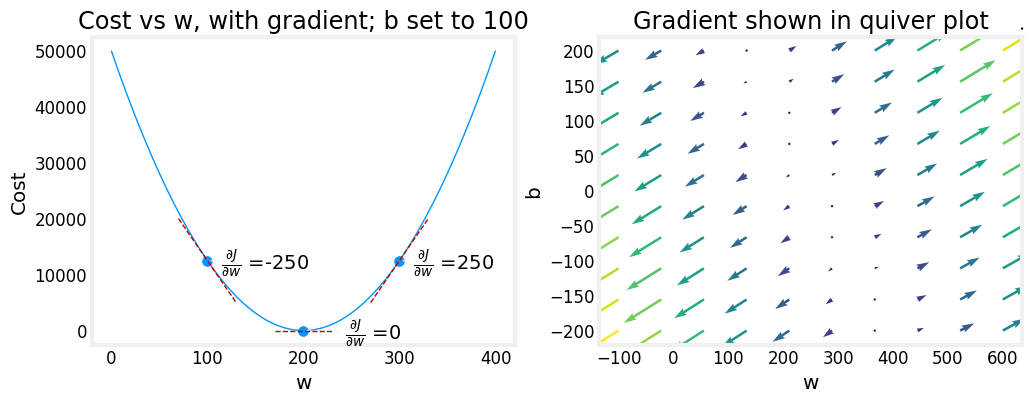

In [48]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

In [49]:
# Gradient Descent

def gradient_descent(x, y, w_start, b_start, alpha, cost_function, gradient_function, iterations):
  '''
    Performs gradient descent to fit w,b.
    Updates w,b by taking num_iters gradient steps with learning rate alpha
    Inputs: x, y, w_start, b_start, alpha, cost_function, gradient_function, iterations
    Output: w, b, cost_list, w_list, b_list
  '''
  w = w_start
  b = b_start
  cost_list = []
  w_list = []
  b_list = []

  for iter in range(iterations):

    # obtaining new w and b
    dj_dw, dj_db = gradient_function(x, y, w, b)

    w = w - alpha*dj_dw
    b = b - alpha*dj_db

    # store
    if iter < 100000:
      cost = cost_function(x, y, w, b)
      cost_list.append(cost)

    w_list.append(w)
    b_list.append(b)

    # print
    if iter% math.ceil(iterations/10) == 0:
      print(f"Iteration {iter:4}: Cost {cost_list[-1]:0.2e} ",
            f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
            f"w: {w: 0.3e}, b:{b: 0.5e}")

  return w, b, cost_list, w_list, b_list




In [50]:
test = compute_gradient(x_train, y_train, 1, 1)
print(test)

(np.float64(-646.0), np.float64(-397.5))


In [52]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, w_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, compute_cost, compute_gradient,iterations)

print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


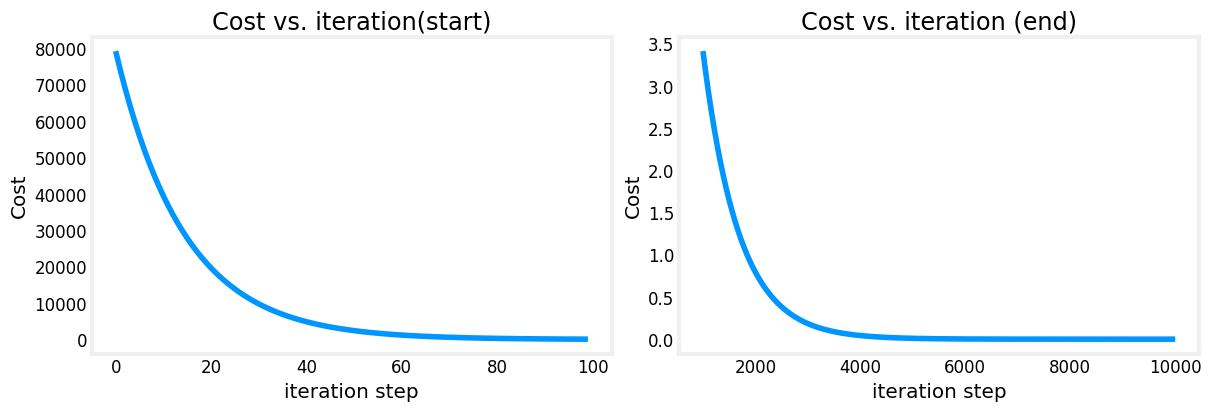

In [53]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()

In [54]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


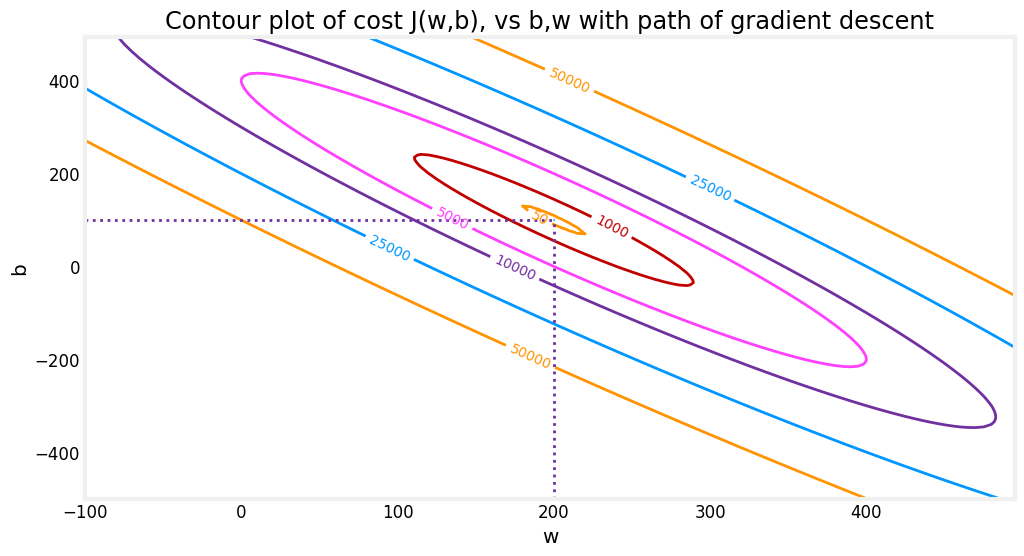

In [55]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, [w_hist, p_hist], ax)

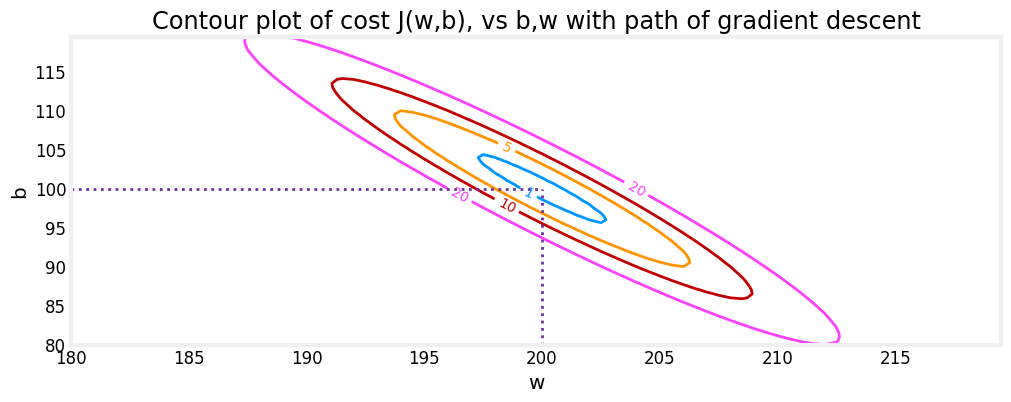

In [56]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, [w_hist, p_hist], ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)

In [59]:
# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 10
tmp_alpha = 8.0e-1
# run gradient descent
w_final, b_final, J_hist, w_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    compute_cost, compute_gradient, iterations)

Iteration    0: Cost 2.58e+05  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  5.200e+02, b: 3.20000e+02
Iteration    1: Cost 7.82e+05  dj_dw:  1.130e+03, dj_db:  7.000e+02   w: -3.840e+02, b:-2.40000e+02
Iteration    2: Cost 2.37e+06  dj_dw: -1.970e+03, dj_db: -1.216e+03   w:  1.192e+03, b: 7.32800e+02
Iteration    3: Cost 7.19e+06  dj_dw:  3.429e+03, dj_db:  2.121e+03   w: -1.551e+03, b:-9.63840e+02
Iteration    4: Cost 2.18e+07  dj_dw: -5.974e+03, dj_db: -3.691e+03   w:  3.228e+03, b: 1.98886e+03
Iteration    5: Cost 6.62e+07  dj_dw:  1.040e+04, dj_db:  6.431e+03   w: -5.095e+03, b:-3.15579e+03
Iteration    6: Cost 2.01e+08  dj_dw: -1.812e+04, dj_db: -1.120e+04   w:  9.402e+03, b: 5.80237e+03
Iteration    7: Cost 6.09e+08  dj_dw:  3.156e+04, dj_db:  1.950e+04   w: -1.584e+04, b:-9.80139e+03
Iteration    8: Cost 1.85e+09  dj_dw: -5.496e+04, dj_db: -3.397e+04   w:  2.813e+04, b: 1.73730e+04
Iteration    9: Cost 5.60e+09  dj_dw:  9.572e+04, dj_db:  5.916e+04   w: -4.845e+04, b:-2.99567e+04


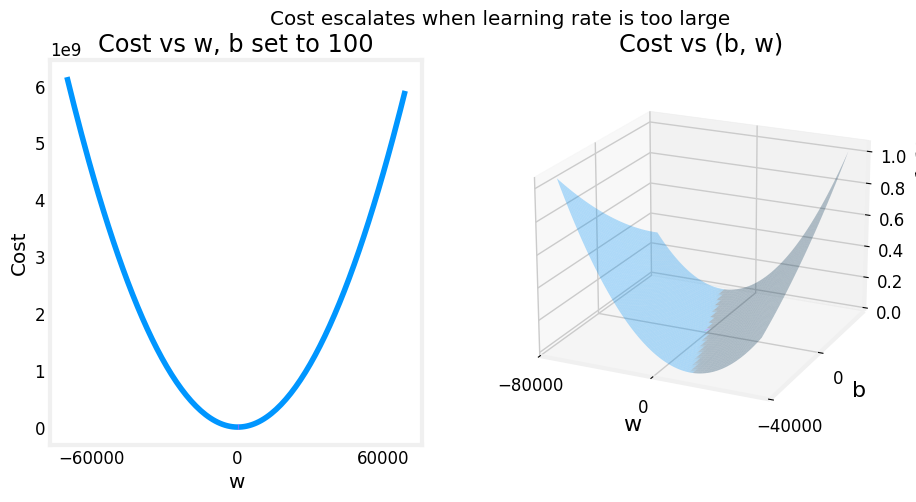

In [61]:
plt_divergence([w_hist, p_hist], J_hist,x_train, y_train)
plt.show()

Yay! :)